### QQ plot

$$ \frac{1}{2}\sigma^2 S^2 \frac{d2V}{dS2} + rS \frac{dV}{dS} - rV = 0 $$

$$ \frac{1}{2}\sigma^2 S^2 \cdot n(n-1) S^{n-2} + rS \cdot nS^{n-1} - rS^n = 0. $$
$$ S^n \left[\frac{1}{2}\sigma^2 n(n-1) + rn - r\right] = 0. $$

$$ \frac{1}{2}\sigma^2 n(n-1) + rn - r = 0. $$

$$ \frac{1}{2}\sigma^2 n^2 + \left(r - \frac{1}{2}\sigma^2\right)n - r = 0. $$

In [4]:
import numpy as np
import pandas as pd
import seaborn as sn

In [5]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

In [20]:
prices = pd.read_csv('./data/JA251.1 SPX.csv', parse_dates=['Date'], dayfirst=True)

In [22]:
prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,NaN,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [24]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24237 entries, 0 to 24236
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       24237 non-null  datetime64[ns]
 1   Open       24237 non-null  float64       
 2   High       24237 non-null  float64       
 3   Low        24237 non-null  float64       
 4   Close      24237 non-null  float64       
 5   Adj Close  24236 non-null  float64       
 6   Volume     24237 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.3 MB


In [28]:
# Filter the data for the specified date range
start_date = "1950-01-03"
end_date = "2013-01-03"
mask = (prices['Date'] >= start_date) & (prices['Date'] <= end_date)
prices_filtered = prices.loc[mask]

In [30]:
prices_filtered.head()

,Date,Open,High,Low,Close,Adj Close,Volume
5496,1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
5497,1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
5498,1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
5499,1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
5500,1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


In [32]:
prices_filtered.shape

(15853, 7)

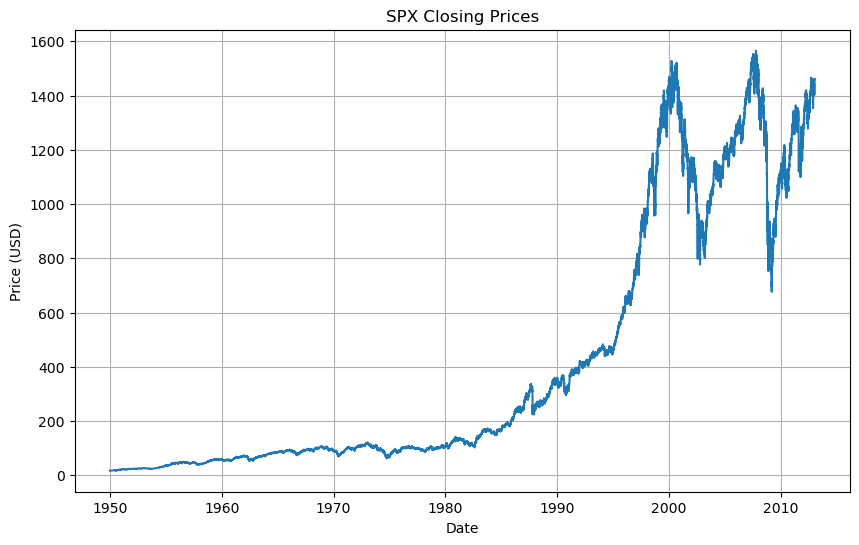

In [34]:
# Plot the closing prices
plt.figure(figsize=(10, 6))
plt.plot(prices_filtered['Date'], prices_filtered['Close'])
plt.title("SPX Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)

In [38]:
# Calculate the log returns
prices_filtered['Log_Returns'] = np.log(prices_filtered['Close']/prices_filtered['Close'].shift(1))

/var/folders/sj/km6fyx_57pn857bnxsqvkj_80000gn/T/ipykernel_15132/3929796216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_filtered['Log_Returns'] = np.log(prices_filtered['Close']).diff()


In [42]:
prices_filtered.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Log_Returns
5496,1950-01-03,16.660000,16.660000,16.660000,16.660000,16.660000,1260000,NaN
5497,1950-01-04,16.850000,16.850000,16.850000,16.850000,16.850000,1890000,0.011340
5498,1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2550000,0.004737
5499,1950-01-06,16.980000,16.980000,16.980000,16.980000,16.980000,2010000,0.002949
5500,1950-01-09,17.080000,17.080000,17.080000,17.080000,17.080000,2520000,0.005872
5501,1950-01-10,17.030001,17.030001,17.030001,17.030001,17.030001,2160000,-0.002932
5502,1950-01-11,17.090000,17.090000,17.090000,17.090000,17.090000,2630000,0.003517
5503,1950-01-12,16.760000,16.760000,16.760000,16.760000,16.760000,2970000,-0.019498
5504,1950-01-13,16.670000,16.670000,16.670000,16.670000,16.670000,3330000,-0.005384
5505,1950-01-16,16.719999,16.719999,16.719999,16.719999,16.719999,1460000,0.002995


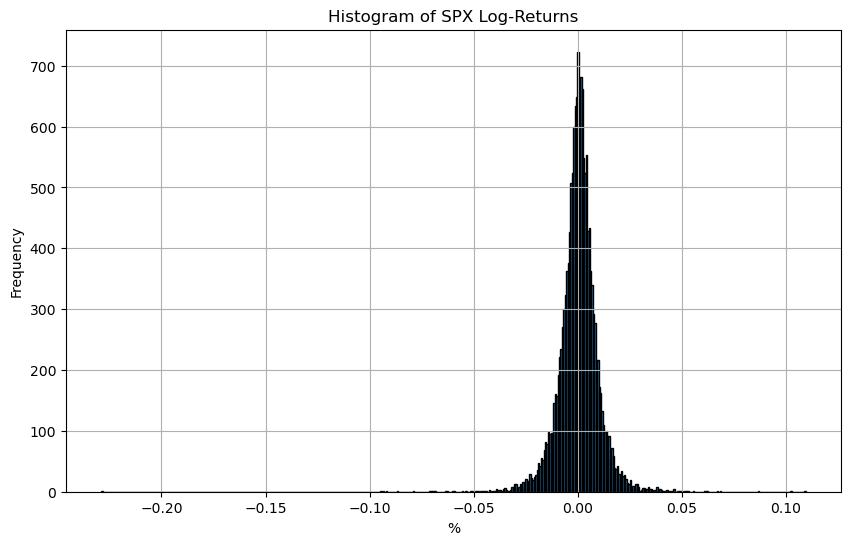

In [72]:
# Plot the histogram of log returns
plt.figure(figsize=(10, 6))
plt.hist(prices_filtered['Log_Returns'].dropna(), bins=500, edgecolor='k')
plt.title("Histogram of SPX Log-Returns")
plt.xlabel("%")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

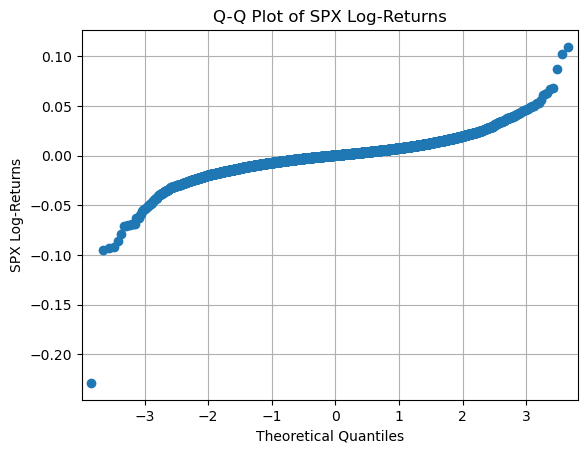

In [86]:
# Q-Q plot
sm.qqplot(prices_filtered['Log_Returns'], line ='s')
plt.title("Q-Q Plot of SPX Log-Returns")
plt.ylabel("SPX Log-Returns")
plt.grid(True)

## Below is the standard distribution's probability density function (PDF)

$$ f(x) = \frac{1}{\sqrt{2\pi}} e{-\frac{x2}{2}} $$

$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} e{-\frac{(x-\mu)2}{2\sigma^2}} $$

$$\max_w \left( w^T \begin{pmatrix} 0.08 \\ 0.10 \\ 0.12 \end{pmatrix} - 3 \cdot w^T \begin{pmatrix} 0.1 & 0.02 & 0.04 \\ 0.02 & 0.08 & 0.03 \\ 0.04 & 0.03 & 0.12 \end{pmatrix} w \right)$$

An example of discrete representation of probability density function:
$$ fX(x) = \frac{nj}{Nh} $$

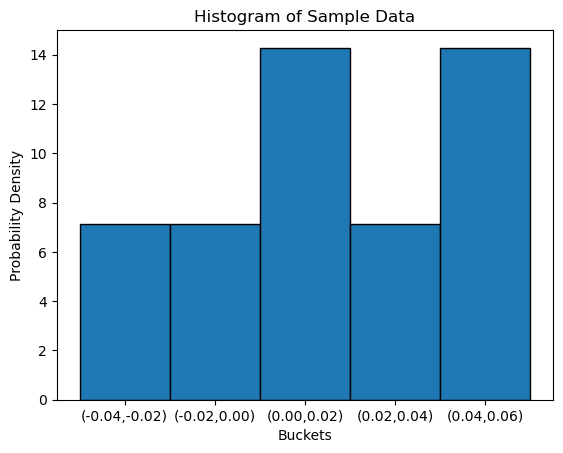

In [8]:
# Sample data
data = [-0.03, -0.01, 0.00, 0.01, 0.02, 0.04, 0.05]
h = 0.02  # Bandwidth
N = len(data)  # Total sample size

# Define the buckets/intervals
buckets = [(-0.04, -0.02), (-0.02, 0.00), (0.00, 0.02), (0.02, 0.04), (0.04, 0.06)]

# Count the observations in each bucket
n_j = [sum(1 for x in data if bucket[0] <= x < bucket[1]) for bucket in buckets]

# Calculate the pdf values for each bucket
pdf_values = [n / (N * h) for n in n_j]

# Bucket centers for plotting
bucket_centers = [(bucket[0] + bucket[1]) / 2 for bucket in buckets]

# Plot the histogram
plt.bar(bucket_centers, pdf_values, width=h, edgecolor='black', align='center')
plt.xlabel('Buckets')
plt.ylabel('Probability Density')
plt.title('Histogram of Sample Data')
plt.xticks(bucket_centers, ['(-0.04,-0.02)', '(-0.02,0.00)', '(0.00,0.02)', '(0.02,0.04)', '(0.04,0.06)'])
plt.show()